# 1012 유기농 배추 ★
다른 블로그 참조 : X

### Q)
차세대 영농인 한나는 강원도 고랭지에서 유기농 배추를 재배하기로 하였다. 농약을 쓰지 않고 배추를 재배하려면 배추를 해충으로부터 보호하는 것이 중요하기 때문에, 한나는 해충 방지에 효과적인 배추흰지렁이를 구입하기로 결심한다. 이 지렁이는 배추근처에 서식하며 해충을 잡아 먹음으로써 배추를 보호한다. 특히, 어떤 배추에 배추흰지렁이가 한 마리라도 살고 있으면 이 지렁이는 인접한 다른 배추로 이동할 수 있어, 그 배추들 역시 해충으로부터 보호받을 수 있다. 한 배추의 상하좌우 네 방향에 다른 배추가 위치한 경우에 서로 인접해있는 것이다.

한나가 배추를 재배하는 땅은 고르지 못해서 배추를 군데군데 심어 놓았다. 배추들이 모여있는 곳에는 배추흰지렁이가 한 마리만 있으면 되므로 서로 인접해있는 배추들이 몇 군데에 퍼져있는지 조사하면 총 몇 마리의 지렁이가 필요한지 알 수 있다. 예를 들어 배추밭이 아래와 같이 구성되어 있으면 최소 5마리의 배추흰지렁이가 필요하다. 0은 배추가 심어져 있지 않은 땅이고, 1은 배추가 심어져 있는 땅을 나타낸다.

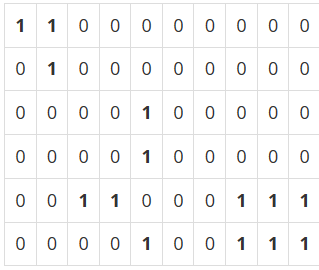

### Input)
입력의 첫 줄에는 테스트 케이스의 개수 T가 주어진다. 그 다음 줄부터 각각의 테스트 케이스에 대해 첫째 줄에는 배추를 심은 배추밭의 가로길이 M(1 ≤ M ≤ 50)과 세로길이 N(1 ≤ N ≤ 50), 그리고 배추가 심어져 있는 위치의 개수 K(1 ≤ K ≤ 2500)이 주어진다. 그 다음 K줄에는 배추의 위치 X(0 ≤ X ≤ M-1), Y(0 ≤ Y ≤ N-1)가 주어진다. 두 배추의 위치가 같은 경우는 없다.

### Output)
각 테스트 케이스에 대해 필요한 최소의 배추흰지렁이 마리 수를 출력한다.

### Source Code)

#### BFS 이용

In [ ]:
from sys import stdin
input = stdin.readline

dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]

def BFS(graph, x, y, M, N):
    queue = []
    queue.append((x, y))
    graph[x][y] = 0

    while queue:
        x, y = queue.pop(0)
        for i in range(4):
            now_x = x + dx[i]
            now_y = y + dy[i]
            if now_x < 0 or now_x >= M or now_y < 0 or now_y >= N:
                continue

            if graph[now_x][now_y] == 1:
                graph[now_x][now_y] = 0
                queue.append((now_x, now_y))



T = int(input())
for _ in range(T):
    M, N, K = map(int, input().split())
    graph = [[0 for _ in range(N)] for _ in range(M)]
    for _ in range(K):
        a, b = map(int, input().split())
        graph[a][b] = 1

    count = 0
    for i in range(M):
        for j in range(N):
            if graph[i][j] == 1:
                BFS(graph, i, j, M, N)
                count += 1

    print(count)
    

#### DFS 이용

In [ ]:
import sys
from sys import stdin
input = stdin.readline
sys.setrecursionlimit(10**9)

dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]

def DFS(x, y, M, N):
    global graph
    if x < 0 or x >= M or y < 0 or y >= N:
        return False
    
    if graph[x][y] == 1:
        graph[x][y] = 0 # 반드시 방문을 했다고 기록하는 것이 중요하다
        for i in range(4):
            now_x = x + dx[i]
            now_y = y + dy[i]
            DFS(now_x, now_y, M, N)
        return True
    return False
        


T = int(input())
for _ in range(T):
    M, N, K = map(int, input().split())
    graph = [[0 for _ in range(N)] for _ in range(M)]
    for _ in range(K):
        a, b = map(int, input().split())
        graph[a][b] = 1

    count = 0
    for i in range(M):
        for j in range(N):
            if DFS(i, j, M, N):
                count += 1

    print(count)
    

이 문제는 2667번 문제와 같은 문제이다.

referecne : https://github.com/Ha-coding-user/BaekJoon_practice/blob/main/graph/2667.ipynb

몇 번 풀었는데도 여전히 실수가 나타나고 있다...